In [2]:
import numpy as np

In [3]:
def geodesicInfoFromMatrix(M): #input is a hyperbolic matrix M which lies in SL_2(Z)
    tr = np.trace(M)
    if np.abs(tr) <= 2:
        raise ValueError('Matrix should have trace > 2')
    if tr < 0:
        M = -M
        tr = -tr
    length = 2*np.log(tr/2+np.sqrt((tr/2)**2-1))
    eig = np.exp(1)**(length/2)
    a = M.item(0,0)
    b = M.item(0,1)
    c = M.item(1,0)
    d = M.item(1,1)
    if c > 0:
        eigMat = (1/((c**2)*(tr**2-4))**(1/4))*np.matrix([[eig-d,1/eig-d],[c,c]])
    else: 
        eigMat = (1/((c**2)*(tr**2-4))**(1/4))*np.matrix([[-eig+d,1/eig-d],[-c,c]])
    visPt = (eig-d)/c
    newA = eigMat.item(0,0)
    newB = eigMat.item(0,1)
    newC = eigMat.item(1,0)
    newD = eigMat.item(1,1)
    z = (newA*1j+newB)/(newC*1j+newD)
    zeta = 1j/(newC*1j+newD)**2
    return (length,eig,eigMat,visPt,z,zeta)

In [4]:
def inFundDom(z):
    return (np.abs(z) >= 1) and (np.abs(np.real(z))<=1/2)

In [5]:
def fundDomRep(z,zeta):
    mat = np.matrix([[1,0],[0,1]])
    while not inFundDom(z):
        trans = np.floor(np.real(z)+1/2) #translation factor
        z = z - trans #desired z
        mat = np.matmul(np.matrix([[1,-trans],[0,1]]),mat)
        if (np.abs(z) < 1):
            zeta = zeta/z**2
            z = -1/z
            mat = np.matmul(np.matrix([[0,1],[-1,0]]),mat)
    return (z,zeta,mat)

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
def fundDomGeo(mat,res): #input hyperbolic geodesic matrix in SL_2(Z)
    geoInfo = geodesicInfoFromMatrix(mat)
    length = geoInfo[0]
    eigMat = geoInfo[2]
    z = geoInfo[4]
    zeta = geoInfo[5]
    pointlist = []
    newRep = fundDomRep(z,zeta)
    z = newRep[0]
    zeta = newRep[1]
    eigMat = np.matmul(newRep[2],eigMat)
    pointlist.append((np.real(z),np.imag(z)))
    yMax = np.imag(z)
    for t in range(res):
        e = np.exp(1)
        eigMat = np.matmul(eigMat,np.matrix([[e**(length/(2*res)),0],[0,e**(-length/(2*res))]]))
        newA = eigMat.item(0,0)
        newB = eigMat.item(0,1)
        newC = eigMat.item(1,0)
        newD = eigMat.item(1,1)
        z = (newA*1j+newB)/(newC*1j+newD)
        if np.imag(z) > yMax:
            yMax = np.imag(z)
        zeta = 1j/(newC*1j+newD)**2
        if not inFundDom(z):
            newRep = fundDomRep(z,zeta)
            z = newRep[0]
            zeta = newRep[1]
            eigMat = np.matmul(newRep[2],eigMat)
        pointlist.append((np.real(z),np.imag(z)))
    fig, ax = plt.subplots()
    # plt.ylim(0,yMax+0.2) # can change the bounds on the y-axis
    ax.scatter(*zip(*pointlist),s=0.1)
    ax.vlines([-1/2,1/2],np.sin(np.pi/3),yMax)
    ax.add_patch(Arc((0, 0), 2, 2,
                 theta1=60, theta2=120))
    plt.show()

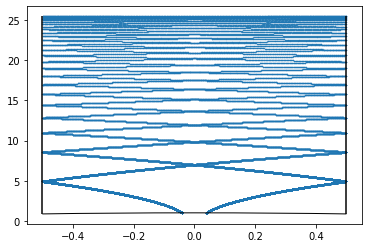

In [12]:
fundDomGeo(np.matrix([[50,49],[1,1]]),100000)

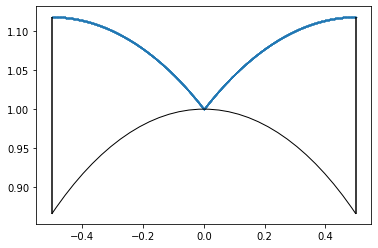

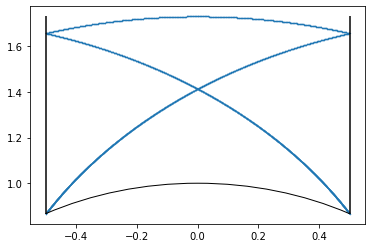

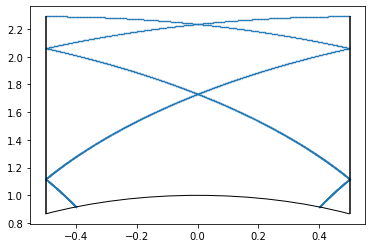

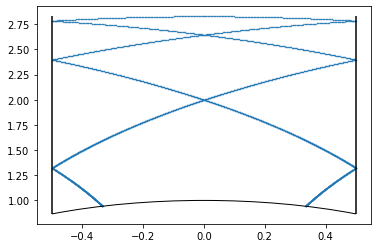

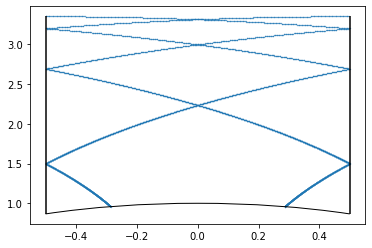

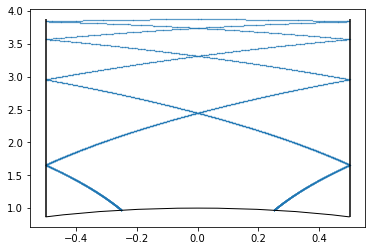

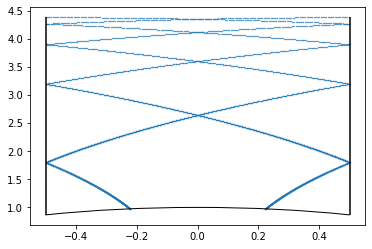

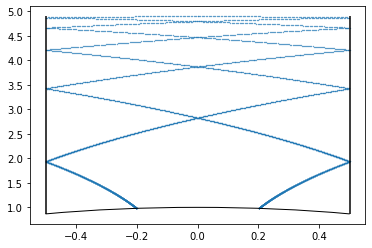

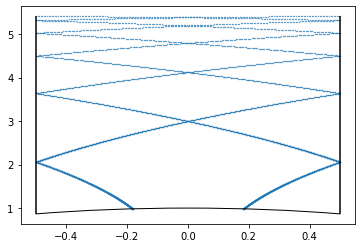

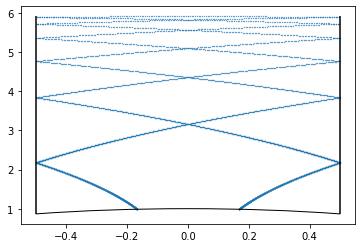

In [18]:
for i in range(10):
    fundDomGeo(np.matrix([[i+2,i+1],[1,1]]),5000)